In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h1>Data checks to perform</h1>
.check missing values <br/>
.check duplicate <br/>
.check the number of unique values of each column <br/>
.check statistics of data set <br/>
.check varios categories present in the different categorical cloumn

In [49]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [50]:
df.duplicated().sum()

0

In [51]:
df.keys()

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [52]:
print(df.nunique())


gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64


In [53]:
for i in df.keys():
    if(df[i].dtype == 'object'):
        print(i)
        print(df[i].unique())

gender
['female' 'male']
race_ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch
['standard' 'free/reduced']
test_preparation_course
['none' 'completed']


In [54]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [55]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print("Numeric Features: ", numeric_features)
print("Categorical Features: ", categorical_features)


Numeric Features:  ['math_score', 'reading_score', 'writing_score']
Categorical Features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [56]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg score'] = df['total score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


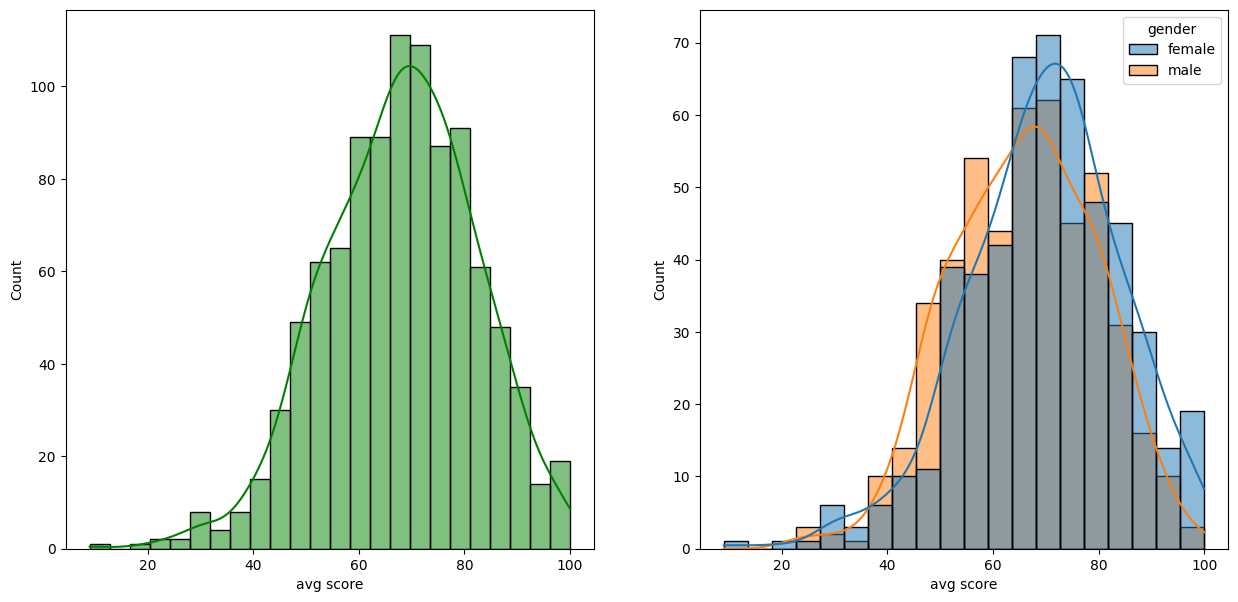

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot: just a histogram
plt.subplot(121)
sns.histplot(df['avg score'], kde=True, color='g')

# Second subplot: histogram with hue by gender
plt.subplot(122)
sns.histplot(data=df, x='avg score', kde=True, hue='gender', bins=20)

plt.show()


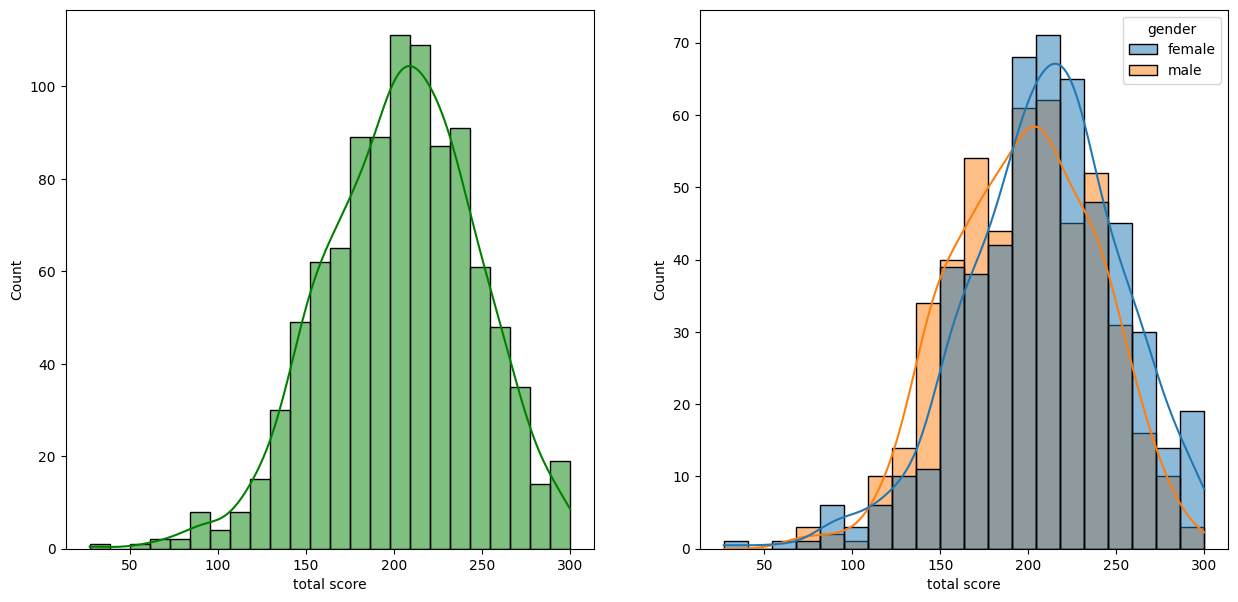

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(df['total score'], kde=True, color='g', ax=axs[0])
sns.histplot(data=df,x='total score', kde=True, hue='gender', bins=20)
plt.show()